# Inhaltsverzeichnis 

- **Random Forest Aufgabe**
    - **Aufgabe 1: Import Data**
    - **Aufgabe 2: Explorative Daten Analyse**
    - **Aufgabe 3: Preprocessing**
    - **Aufgabe 4: Random Forest Classifier mit 100 Estimators**
    - **Aufgabe 5: Ergebnis vom 100-RFC**
    - **Aufgabe 6: Random Forest Classifier mit 1000 Estimators**
    - **Aufgabe 7: Ergebnis vom 1000-RFC**
    - **Aufgabe 8: Confusion Matrix**
    - **Aufgabe 9: Feauture Importance**
    - **Aufgabe 10: Visualisierung eines Baums**
    - **Aufgabe 11: Random Forest Classifier mit 1000 Estimators und Depth 2**
    - **Aufgabe 12: Ergebnis vom 1000-2-RFC**
    - **Aufgabe 13: Visualisierung eines Baums**


# Random Forest Aufgabe

## Aufgabe 1: Import Data

Wir werden unser Random Forest Modell auf den Datensatz [Car Evaluation Data Set](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) testen lassen. Wie du merken wirst, sind alle Spalten des Datensatzes als Strings codiert, z.B. nimmt das Feature `doors` den Wert `5more` an. Damit wir unseren Algorithmus reibungslos anwenden können, haben wir die Daten schon zu Integers codiert. 

- Lade die `csv` Datei aus dem Mitgliederbereich auf deinen Computer.
- Mache dich mit den Daten vertraut.
- Importiere die Daten in ein [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

Importiere zuerst die nötigen Bibliotheken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("12car_evaluation.csv")

## Aufgabe 2: Explorative Daten Analyse

Bekomme ein Gefühl für die Daten, indem du Funktionen zur explorativen Datenanalyse aufrufst:

- [`df.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [`df.sample(n=10)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)
- [`df.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- [`df.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
- [`df[c].value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) für jede Spalte `c`.

- Was zeigen die einzelnen Ergebnisse an?

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [4]:
df.sample(n = 10)

,buying,maint,doors,persons,lug_boot,safety,class
1227,1,0,1,1,1,0,0
752,2,1,3,2,1,2,1
1179,1,1,3,2,0,0,0
416,3,0,3,1,0,2,1
677,2,1,1,0,0,2,0
913,1,3,1,2,1,1,1
382,3,0,2,0,1,1,0
93,3,3,3,1,1,0,0
1634,0,0,0,1,1,2,2
243,3,1,1,0,0,0,0


In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 108.0 KB


In [7]:
print(df["buying"].value_counts())
print(df["maint"].value_counts())
print(df["doors"].value_counts())
print(df["persons"].value_counts())
print(df["lug_boot"].value_counts())
print(df["safety"].value_counts())
print(df["class"].value_counts())

buying
3    432
2    432
1    432
0    432
Name: count, dtype: int64
maint
3    432
2    432
1    432
0    432
Name: count, dtype: int64
doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64
persons
0    576
1    576
2    576
Name: count, dtype: int64
lug_boot
0    576
1    576
2    576
Name: count, dtype: int64
safety
0    576
1    576
2    576
Name: count, dtype: int64
class
0    1210
1     384
2      69
3      65
Name: count, dtype: int64


In [8]:
# 0: unacc 1210 , 1: acc 384, 2: good 69, 3: very good 65        # Labels

In [8]:
df.shape

(1728, 7)

## Aufgabe 3: Preprocessing

Wie schon öfters gesehen, wollen wir unseren Datensatz aufteilen in die (_reinen_) Daten `X` und das Label (*Target*) `y`.

- Erstelle ein DataFrame `X` aus `df` _ohne_ das Feature `class`.
- Erstelle ein Series `y` aus dem Feature `class` von `df`.

Nun wollen wir `X` und `y` in Trainings- und Testdaten aufteilen.

- Rufe die [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) Funktion mit einem Testanteil von ⅓ auf.
- Verifiziere die Ergebnisse mit dem `shape` Attribut der DataFrames.

In [9]:
X = df.drop(["class"], axis = 1)
y = df["class"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1157, 6)
(571, 6)
(1157,)
(571,)


## Aufgabe 4: Random Forest Classifier mit 100 Estimators

- Erstelle nun einen [**Random Forest Classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (RFC) mit 100 Entscheidungsbäumen.
- Trainiere das Modell mit der [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit) Funktion auf dem Trainingsdatensatz.
- Sage die Klassen der Samples der Testdaten vorher.

In [12]:
clf = RandomForestClassifier(random_state = 0, n_estimators = 100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

## Aufgabe 5: Ergebnis vom 100-RFC

- Teste die Performance des trainierten Modelles durch [`accuracy score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) und [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).
- Sind die Vorhersagen aussagekräftig?

In [13]:
print("Der Accuracy-Score beträgt:", accuracy_score(y_test, predictions).round(2))
print("Entfernung vom richtigen Ergebnis im Schnitt: ", mean_absolute_error(y_test, predictions).round(2))

Der Accuracy-Score beträgt: 0.97
Entfernung vom richtigen Ergebnis im Schnitt:  0.04


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.92      0.97      0.95       126
           2       0.96      0.85      0.90        27
           3       0.84      0.84      0.84        19

    accuracy                           0.97       571
   macro avg       0.93      0.91      0.92       571
weighted avg       0.97      0.97      0.97       571



In [15]:
# aussagekräftige Vorhersagen

## Aufgabe 6: Random Forest Classifier mit 1000 Estimators

- Erstelle nun einen Random Forest Classifier mit **1000 Entscheidungsbäumen**.
- Trainiere das Modell mit der `fit` Funktion auf dem Trainingsdatensatz.
- Sage die Klassen der Testdaten vorher.

In [16]:
clf02 = RandomForestClassifier(random_state = 0, n_estimators = 1000)
clf02.fit(X_train, y_train)
predictions02 = clf02.predict(X_test)

## Aufgabe 7: Ergebnis vom 1000-RFC

- Teste die Ergebnisse des trainierten Modelles durch `accuracy score` und `mean_absolute_error`.
- Vergleiche die Werte mit dem 100-RFC. Sind die Vorhersagen besser?

In [17]:
print("Der Accuracy-Score beträgt:", accuracy_score(y_test, predictions02).round(2))
print("Entfernung vom richtigen Ergebnis im Schnitt: ", mean_absolute_error(y_test, predictions02).round(2))

Der Accuracy-Score beträgt: 0.97
Entfernung vom richtigen Ergebnis im Schnitt:  0.04


In [18]:
print(classification_report(y_test, predictions02))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       399
           1       0.93      0.97      0.95       126
           2       0.92      0.89      0.91        27
           3       0.80      0.84      0.82        19

    accuracy                           0.97       571
   macro avg       0.91      0.92      0.92       571
weighted avg       0.97      0.97      0.97       571



In [ ]:
# Gleiche Werte bei Vorhersagen mit 1000-RFC

## Aufgabe 8: Confusion Matrix

- Erstelle und interpretiere die [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) für die Testsamples und deren Vorhersagen. 

In [19]:
matrix = confusion_matrix(y_test, predictions)
matrix

array([[394,   5,   0,   0],
       [  2, 122,   1,   1],
       [  0,   2,  23,   2],
       [  0,   3,   0,  16]], dtype=int64)

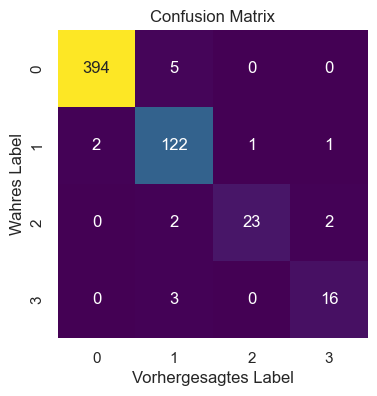

In [20]:
figure = plt.figure(figsize=(4,4))
s = sns.heatmap(matrix, annot=True, cbar = False,  cmap="viridis", fmt = ".0f")
s.set_xlabel("Vorhergesagtes Label")
s.set_ylabel("Wahres Label")
s.set_title("Confusion Matrix")
plt.show()

In [21]:
matrix02 = confusion_matrix(y_test, predictions02)
matrix02

array([[393,   6,   0,   0],
       [  1, 122,   2,   1],
       [  0,   0,  24,   3],
       [  0,   3,   0,  16]], dtype=int64)

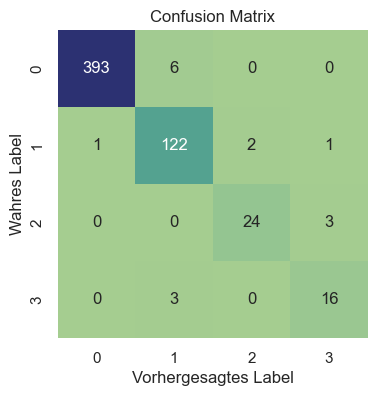

In [22]:
figure = plt.figure(figsize=(4,4))
s = sns.heatmap(matrix02, annot=True, cbar = False,  cmap="crest", fmt = ".0f")
s.set_xlabel("Vorhergesagtes Label")
s.set_ylabel("Wahres Label")
s.set_title("Confusion Matrix")
plt.show()

In [ ]:
# Die Vorhersagen sind bei beiden Matrixen nahezu identisch mit geringfügigen Unterschieden 

## Aufgabe 9: Feauture Importance

Das Attribut [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) enthält weitere wichtige Informationen, um unser Modell zu verbessern.

- Erstelle ein Series mit den Werten der `feature_importances_` und dem Spaltennamen als Index.
- Sortiere die Series und interpretiere die Ergebnisse.
- Welche Features sind am wichtigsten für die Klassifizierung?

In [23]:
importances = (clf.feature_importances_)
    
dict01 = dict(zip(df.columns,importances))
dict01_sorted = sorted(dict01.items(), key=lambda x: x[1])

for (f, i) in dict01_sorted[::-1]:
    print(f"{f:<10} importance: {i:>15.3f}")

safety     importance:           0.298
persons    importance:           0.255
buying     importance:           0.157
maint      importance:           0.139
lug_boot   importance:           0.089
doors      importance:           0.062


In [ ]:
# am Wichtigsten sind safety und persons

## Aufgabe 10: Visualisierung eines Baums

Visualisiere einen zufälligen Baum aus einem der `Random Forest` mit der Funktion [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).


Text(0.5, 1.0, 'Baum 57 des Random Forests')

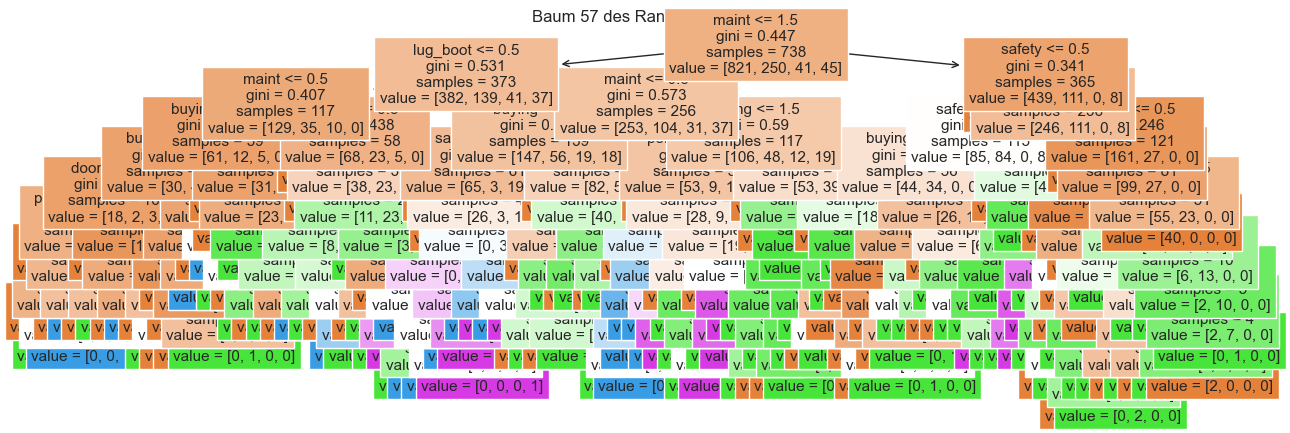

In [24]:
number_of_tree = 57

plt.figure(figsize=(15,5))
plot_tree(clf02.estimators_[number_of_tree], filled=True, feature_names = list(df.columns), fontsize=11)   

plt.title(f"Baum {number_of_tree} des Random Forests")

## Aufgabe 11: Random Forest Classifier mit 1000 Estimators und Depth 2

Der Baum ist sehr tief. Um eine einfachere Visualisierung zu schaffen, testen wir schließlich einen RFC mit 1000 Entscheidungsbäumen, aber nur eine Tiefe von 2.

- Erstelle einen neuen Random Forest Classifier mit **1000 Entscheidungsbäumen** und einer **Tiefe von 2**.
- Trainiere das Modell mit der `fit` Funktion auf dem Trainingsdatensatz.
- Sage die Klassen der Testdaten vorher.

In [25]:
clf03 = RandomForestClassifier(max_depth = 2, random_state = 0, n_estimators = 1000)
clf03.fit(X_train, y_train)
predictions03 = clf03.predict(X_test)

## Aufgabe 12: Ergebnis vom 1000-2-RFC

- Teste die Ergebnisse des trainierten Modelles durch `accuracy score` und `mean_absolute_error`.
- Was ändert sich durch die neue Tiefe der Bäume?

In [26]:
print("Der Accuracy-Score beträgt:", accuracy_score(y_test, predictions03).round(2))
print("Entfernung vom richtigen Ergebnis im Schnitt: ", mean_absolute_error(y_test, predictions03).round(2))

Der Accuracy-Score beträgt: 0.7
Entfernung vom richtigen Ergebnis im Schnitt:  0.42


In [27]:
print(classification_report(y_test, predictions03))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       399
           1       0.00      0.00      0.00       126
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        19

    accuracy                           0.70       571
   macro avg       0.17      0.25      0.21       571
weighted avg       0.49      0.70      0.57       571



C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Die Vorhersagen verschlechtern sich ziemlich von accuarcy 0.97 auf nur mehr 0.70 mit max_depth = 2

## Aufgabe 13: Visualisierung eines Baums

Visualisiere einen zufälligen Baum aus dem neuen `Random Forest` (mit Tiefe 2). Nun sollte sich klarer erkennen lassen, welche Entscheidungen der Baum trifft. 

- Interpretiere die Visualisierung.

Text(0.5, 1.0, 'Baum 57 des Random Forests')

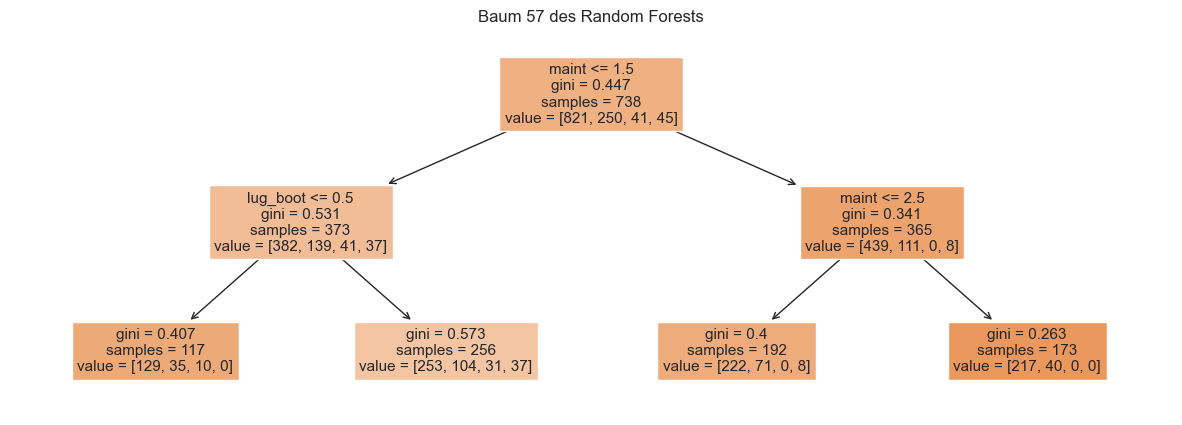

In [28]:
number_of_tree = 57

plt.figure(figsize=(15,5))
plot_tree(clf03.estimators_[number_of_tree], filled=True, feature_names = list(df.columns), fontsize=11)   

plt.title(f"Baum {number_of_tree} des Random Forests")

In [ ]:
# stellt nur mehr 2 Fragen bei max_depth = 2 (Einbezug von 2 features)

# ohne Beschränkung von max_depth stellt er so viele Fragen wie möglich unter Einbezug aller features